In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import re
import wordcloud
import plotly.graph_objects as go
import plotly.express as px

In [2]:
data = pd.read_csv('../data/combined_clean_v7.csv')
data['clean'] = data['clean'].values.astype('U')

In [3]:
print(data.shape)
print(data.drop_duplicates().shape)

data = data.drop_duplicates().reset_index(drop = True)

(234362, 4)
(233361, 4)


In [4]:
data.sample(n = 20)

source  year  \
180118            onion  2016   
75686               npr  2017   
21885   Huffington Post  2016   
212793         Fox News  2017   
183865            onion  2018   
41764     ABC Australia  2016   
144702         guardian  2017   
26598   Huffington Post  2019   
162008         atlantic  2017   
211418         Fox News  2019   
210070         Fox News  2018   
165719         atlantic  2017   
121383         guardian  2019   
38516     ABC Australia  2016   
173393         atlantic  2016   
125104         guardian  2019   
175625         atlantic  2016   
206517         Fox News  2018   
77888               npr  2018   
134378         guardian  2018   

                                                    clean  is_sarcastic  
180118    study cities have unique bacterial fingerprints             1  
75686   a googlerelated plan brings futuristic vision ...             0  
21885   tiny oneeyed chihuahua inspires music in young...             0  
212793  jigsaw movie inspires terrifying escape room e...             0  
183865  pilot informs passengers they will be reroutin...             1  
41764                          crothers burra food stepup             0  
144702  turkey complains about aggressive usa police a...             0  
26598   eric bolling tells bill oreilly not to use his...             0  
162008  is there any way to be an ethical moviegoer in...             0  
211418  north carolina town ends new years eve possum ...             0  
210070  trumps withdrawal from iran nuclear deal sets ...             0  
165719  macron standing alongside putin says russian m...             0  
121383  north carolina republican backed by trump wins...             0  
38516                             productivity commission             0  
173393                       the mike pence hoosiers know             0  
125104  herbie hancock i felt like i stood on the shou...             0  
175625   google payday loans are too harmful to advertise             0  
206517  carrie fishers brother todd details their tens...             0  
77888       these royal wedding watch parties are no joke             0  
134378  senate approves bill to overhaul system for re...             0

In [5]:
data.describe()

year   is_sarcastic
count  233361.000000  233361.000000
mean     2017.941597       0.094382
std         1.395588       0.292360
min      2016.000000       0.000000
25%      2017.000000       0.000000
50%      2018.000000       0.000000
75%      2019.000000       0.000000
max      2020.000000       1.000000

In [6]:
sarcastic_year_group = data.groupby(['year','is_sarcastic']).count()
sarcastic_year_group = sarcastic_year_group.reset_index()
sarcastic_year_group = sarcastic_year_group[[ 'year', 'is_sarcastic', 'clean']]
sarcastic_year_group.columns = ['year', 'is_sarcastic', 'count']

In [7]:
fig = px.bar(sarcastic_year_group, x="year", y="count", color="is_sarcastic", title="Satirical vs Non-Satirical")
fig.show()

In [8]:
source_year_group = data.groupby(['source','year','is_sarcastic']).count()
source_year_group = source_year_group.reset_index()
source_year_group = source_year_group[['source', 'year', 'is_sarcastic', 'clean']]
source_year_group.columns = ['source', 'year', 'is_sarcastic', 'count']

In [9]:
fig = px.bar(source_year_group, x="year", y="count", color="source", title="Sources by Year")
fig.show()

In [10]:
fig = px.bar(source_year_group, x="source", y="count", color="year", title="Year by Source")
fig.show()

### Word Frequency

In [11]:
all_text = " ".join(data['clean'].values)
splitted = all_text.split()
word_counts = {}
for word in splitted:
    word_counts[word] = word_counts.get(word, 0) + 1

In [12]:
word_dicts_list = []

for word in word_counts.keys():
    word_dicts_list.append({"word": word, "count": word_counts[word]})

In [13]:
wc_df = pd.DataFrame(word_dicts_list)
wc_df = wc_df.sort_values('count', ascending = False).reset_index(drop = True)
wc_df

word  count
0                   to  64567
1                  the  59740
2                   of  43529
3                   in  43296
4                    a  30033
...                ...    ...
70752           kordei      1
70753  billionpassword      1
70754            yiyun      1
70755            exgop      1
70756          moussas      1

[70757 rows x 2 columns]

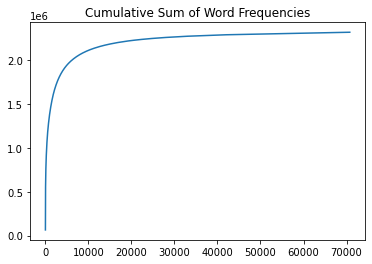

In [14]:
plt.plot(np.cumsum(a = wc_df['count']))
plt.title("Cumulative Sum of Word Frequencies")
plt.show()

In [15]:
print(np.cumsum(a = wc_df['count'])[10000])
print(np.cumsum(a = wc_df['count'])[10000]/np.sum(wc_df['count']))
wc_df.iloc[10000]

2111603
0.9109692343399883


word     cancers
count         20
Name: 10000, dtype: object

### Source Specific Language

In [16]:
from sklearn import feature_extraction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [27]:
data['token_len'] = data['clean'].apply(lambda x: len(str(x).split()))
data = data.loc[data['token_len'] > 0]
data = data.loc[data['token_len'] <= 41]
data.reset_index(inplace = True, drop = True)

In [28]:
data.sort_values(by = 'token_len')

source  year  \
165243         atlantic  2017   
56385     ABC Australia  2016   
161654         atlantic  2017   
59541     ABC Australia  2019   
40850     ABC Australia  2018   
...                 ...   ...   
199749       Hard Times  2020   
183484            onion  2018   
186963            onion  2019   
188313            onion  2020   
11647   Huffington Post  2019   

                                                    clean  is_sarcastic  \
165243                                                nan             0   
56385                                                buns             0   
161654                                               ring             0   
59541                                        repatriation             0   
40850                                           guerillas             0   
...                                                   ...           ...   
199749  aspiring symphony musician seeks 20 violinists...             1   
183484  one for the road seaworld has realized people ...             1   
186963  thomas jefferson the tree of liberty must be r...             1   
188313  hawks celtics nets hornets bulls cavs mavs nug...             1   
11647   occasionally you realize someone you thought w...             0   

        token_len  
165243          1  
56385           1  
161654          1  
59541           1  
40850           1  
...           ...  
199749         34  
183484         35  
186963         37  
188313         37  
11647          38  

[233356 rows x 5 columns]

In [29]:
clean.sample(n = 5)

source  year  \
143787         guardian  2018   
31325   Huffington Post  2016   
54345     ABC Australia  2019   
154768         guardian  2017   
80927               npr  2017   

                                                    clean  is_sarcastic  \
143787  opec saudis keen to pump more oil but cartels ...             0   
31325   this kylie and kris jenner face swap looks so ...             0   
54345                         hong kong protests escalate             0   
154768  ice agents are out of control and they are onl...             0   
80927   chiles president says cataclysmic wildfires ar...             0   

        token_len  
143787         13  
31325          12  
54345           4  
154768         12  
80927           9

In [30]:
cv = feature_extraction.text.CountVectorizer(lowercase = True,
                                             strip_accents = 'ascii',
                                             ngram_range=(1,3),
                                             stop_words="english",
                                             max_df = .8,
                                             min_df = 10, binary = True)

In [31]:
train = data.loc[data['year'] != 2020]
test = data.loc[data['year'] == 2020]

X_train = train['clean'].values.astype('U')

In [32]:
print("Fitting Count Vectorizer")
cv.fit(X_train)
X_train_cv = cv.transform(X_train)

Fitting Count Vectorizer


In [33]:
train['source'].unique()

array(['Huffington Post', 'ABC Australia', 'npr', 'guardian',
       'nottheonion', 'atlantic', 'onion', 'reductress',
       'national report', 'Hard Times', 'Fox News'], dtype=object)

In [34]:
source_specific = []
for source in train['source'].unique():
    Y_train = train['source'].apply(lambda x: 1 if x == source else 0)
    lr_cv = LogisticRegression(max_iter = 100)
    lr_cv.fit(X_train_cv, Y_train)
    
    vocab = cv.get_feature_names()
    coef_dicts = []
    for i, coef_ in enumerate(list(lr_cv.coef_[0,:])):
        coef_dict = {'word': vocab[i], 'coef': coef_}
        coef_dicts.append(coef_dict)
    coef_pd = pd.DataFrame(coef_dicts)
    source_dict = {'source': source, 'phrases': coef_pd.sort_values('coef', ascending=False)['word'][:50].values}
    source_specific.append(source_dict)

C:\ProgramData\Anaconda3\envs\term_project\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\Anaconda3\envs\term_project\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Pro

In [35]:
source_specific

[{'source': 'Huffington Post',
  'phrases': array(['antilgbtq', 'hilariously', 'news roundup', 'nsfw', 'tweeters',
         'fk', 'spoof', 'maher', 'riverdale', 'gulf crisis', 'spoton',
         'conan', 'sweetest', 'hidden figures', 'gawker', 'excop',
         'weekend roundup', 'behold', 'dear', 'cooking cuff', 'ellen',
         'snl', 'bachelor', 'queer', 'adele', 'updated', 'ridiculously',
         'terrorist attacks', 'van jones', 'away murder', 'mindful',
         'labor day', 'asianamerican', 'reflections', 'walking dead',
         'nightmares', 'colbert', 'trump terrible', 'hilarious', 'educator',
         'lgbtq', 'suicide squad', 'islamophobia', 'fking', 'sums',
         'adorably', 'funniest', 'john kasich', 'recipes', 'standing rock'],
        dtype=object)},
 {'source': 'ABC Australia',
  'phrases': array(['anti', 'darwin', 'sex marriage', 'big country', 'year old',
         'victoria', 'turnbull', 'victorian', 'just game', 'kimberley',
         'wollongong', 'telstra', 'm

Huffington Post


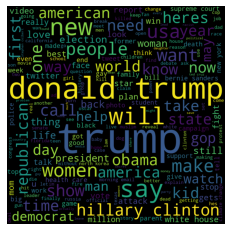

ABC Australia


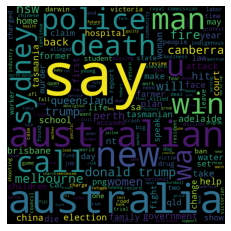

npr


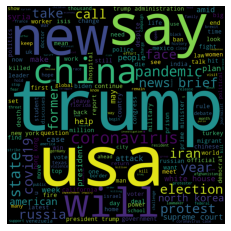

guardian


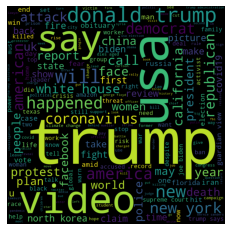

nottheonion


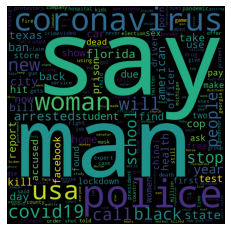

atlantic


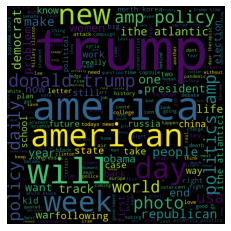

onion


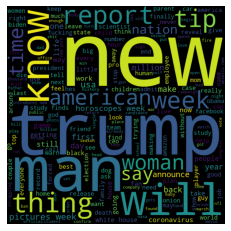

reductress


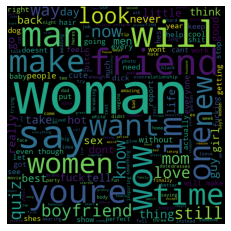

national report


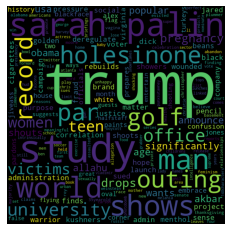

Hard Times


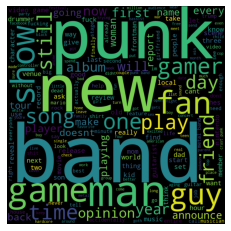

Fox News


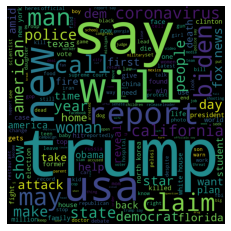

In [36]:
for source in clean['source'].unique():
    source_text = clean.loc[clean['source'] == source]['clean'].astype('U')

    wc = wordcloud.WordCloud(width = 800, height = 800).generate(" ".join(source_text))
    plt.imshow(wc)
    plt.axis("off")
    print(source)
    plt.show()